In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.shape

(119390, 32)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df=df.drop(['arrival_date_week_number','arrival_date_day_of_month',
           'babies','country','previous_bookings_not_canceled',
           'reservation_status_date','reservation_status'],axis=1)

df['num_people'] = df['adults']+df['children']
df['days'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [8]:
df['room_matched'] = True
for i in range(len(df)):
    if df['reserved_room_type'][i]==df['assigned_room_type'][i]:
        df['room_matched'][i] = True
    else:
        df['room_matched'][i] = False

C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
df = df.drop(['reserved_room_type','assigned_room_type',
             'adults','children','agent','company',
              'stays_in_weekend_nights','stays_in_week_nights','adr'],axis=1)

df[:3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,num_people,days,room_matched
0,Resort Hotel,0,342,2015,July,BB,Direct,Direct,0,0,3,No Deposit,0,Transient,0,0,2.0,0,True
1,Resort Hotel,0,737,2015,July,BB,Direct,Direct,0,0,4,No Deposit,0,Transient,0,0,2.0,0,True
2,Resort Hotel,0,7,2015,July,BB,Direct,Direct,0,0,0,No Deposit,0,Transient,0,0,1.0,1,False


In [10]:
df = df.fillna(0)
df.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
meal                           0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
num_people                     0
days                           0
room_matched                   0
dtype: int64

In [11]:
df.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month              object
meal                            object
market_segment                  object
distribution_channel            object
is_repeated_guest                int64
previous_cancellations           int64
booking_changes                  int64
deposit_type                    object
days_in_waiting_list             int64
customer_type                   object
required_car_parking_spaces      int64
total_of_special_requests        int64
num_people                     float64
days                             int64
room_matched                      bool
dtype: object

In [12]:
var_list = df.columns.to_list()

var_list.remove('lead_time')
var_list.remove('is_canceled')
var_list.remove('previous_cancellations')
var_list.remove('booking_changes')
var_list.remove('days_in_waiting_list')
var_list.remove('required_car_parking_spaces')
var_list.remove('total_of_special_requests')
var_list.remove('num_people')
var_list.remove('days')
var_list.remove('is_repeated_guest')
var_list

['hotel',
 'arrival_date_year',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type',
 'room_matched']

In [13]:
df_with_dummies = pd.get_dummies(df,columns=var_list)


## Random Forest

In [23]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics

X = df_with_dummies.drop(columns=['is_canceled'],axis=1)
y = df_with_dummies['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0,class_weight="balanced")
model.fit(X_train,y_train)
y_pred =model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8490102465309769


In [25]:
confusion_matrix(y_test, y_pred)

array([[20082,  2289],
       [ 3119, 10327]], dtype=int64)

In [26]:
f1_score(y_test,y_pred)

0.7924948200445092

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

model1 =  LogisticRegression(random_state=0, class_weight='balanced')
model1.fit(X_train,y_train)
y_pred1 =model1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

C:\Users\Grant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7815283245386269


In [18]:
confusion_matrix(y_test, y_pred1)

array([[17943,  4428],
       [ 3397, 10049]], dtype=int64)

In [27]:
f1_score(y_test,y_pred1)

0.7197650682233284

## XGBoost

In [19]:
from xgboost import plot_importance,XGBClassifier

In [20]:
model2 = XGBClassifier(n_estimators=1000,learning_rate=0.5)
model2.fit(X_train,y_train)
y_pred2 =model2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.8491498450456487


In [21]:
confusion_matrix(y_test, y_pred2)

array([[20110,  2261],
       [ 3142, 10304]], dtype=int64)

In [28]:
f1_score(y_test,y_pred2)

0.7922801891507439

In [29]:
model2.feature_importances_

array([1.8282756e-03, 3.4211641e-03, 2.2391129e-02, 2.4758873e-03,
       1.3548683e-03, 1.7823569e-01, 4.2003640e-03, 1.5992591e-03,
       1.4760611e-03, 2.3519977e-03, 0.0000000e+00, 3.4987275e-03,
       1.7801869e-03, 1.9731375e-03, 1.5268276e-03, 1.6279087e-03,
       1.4330301e-03, 1.6301415e-03, 1.2745698e-03, 1.6722645e-03,
       1.5908694e-03, 1.8299497e-03, 1.6385973e-03, 1.5545298e-03,
       1.5232140e-03, 1.4952836e-03, 1.7924745e-03, 1.5299665e-03,
       1.7417416e-03, 1.5295346e-03, 2.3717522e-03, 8.4447704e-04,
       1.1016985e-03, 2.1561929e-03, 1.6762292e-03, 2.4695012e-03,
       3.0978129e-03, 9.8680388e-03, 0.0000000e+00, 3.3691367e-03,
       1.5209478e-03, 8.5480680e-04, 2.8453518e-03, 0.0000000e+00,
       1.0662983e-03, 6.8742090e-01, 1.5196691e-03, 1.8304584e-03,
       6.4663508e-04, 5.3819101e-03, 5.1897550e-03, 1.2790701e-02,
       0.0000000e+00], dtype=float32)

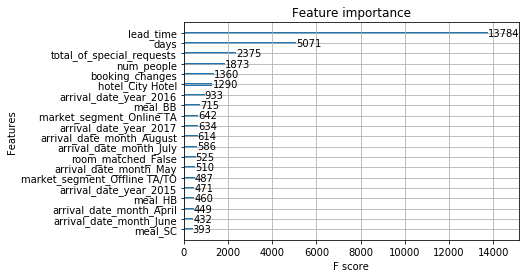

In [22]:
plot_importance(model2,max_num_features=20)
plt.show()